In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def LogisticCostFunction(expected, output):
    return -1 * (sum(expected * np.log(output + 0.00000001) + (1 - expected) * np.log(1.00000001 - output)) / len(
        expected))


In [19]:
def sigmoid(output):
    return 1 / (1 + np.exp(-1 * output))

In [20]:
def logistic_regression(input, params, expected, alpha, epochs):
    costarr = []
    for i in range(epochs):
        result = np.dot(params, input)
        result = np.transpose(result)
        result = sigmoid(result)
        cost = LogisticCostFunction(expected, result)
        costarr.append(cost)
        params = params - alpha * (np.sum(input * np.transpose((result - expected)), 1))
    plt.plot(np.arange(0, len(costarr)), costarr)
    plt.show()
    return params

 Load the training data

In [21]:
file = open("data/Social_Network_Ads.csv", "r")
train = np.zeros((0, 4))
out = np.zeros((0, 1))
file.readline()
for line in file.readlines():
    words = line.split(",")
    if words[1] == 'Male':
        train = np.append(train, np.array([[1, 1, float(words[2]), float(words[3])]]), axis=0)
    else:
        train = np.append(train, np.array([[1, 0, float(words[2]), float(words[3])]]), axis=0)
    val = float(words[4][0])
    out = np.append(out, np.array([[val]]), axis=0)
train = np.transpose(train)


[1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.

Scaling

In [22]:
maxOfRows = np.transpose(np.array([np.max(train, axis=1)]))
minOfRows = np.transpose(np.array([np.min(train, axis=1)]))
trainScaled = train - minOfRows
trainScaled[1:] = trainScaled[1:] / (maxOfRows[1:] - minOfRows[1:])


split in to training and testing

In [23]:
testScaled, trainScaled = np.hsplit(trainScaled, np.array([40]))
out_test = out[:40]
out_train = out[40:]


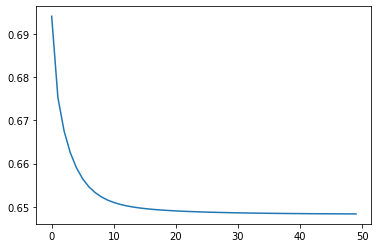

In [24]:
params = np.array([[0.01, 0.01, 0.01, 0.01]])
alpha = 0.01
params = logistic_regression(trainScaled, params, out_train, alpha, 50)

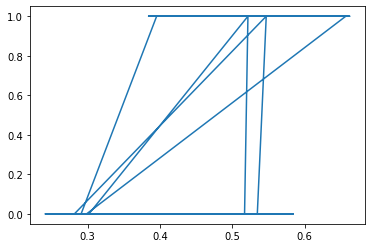

In [25]:
predicted=sigmoid(np.transpose(np.dot(params, testScaled)))
plt.plot(predicted, out_test)
plt.show()
